In [1]:
# Code taken from https://www.geeksforgeeks.org/k-means-clustering-on-the-handwritten-digits-data-using-scikit-learn-in-python/
import time
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits 
from sklearn.preprocessing import scale

digits_data = load_digits().data
scaled_data = scale(digits_data) 
print(scaled_data) 

Y = load_digits().target 
print(Y)


k = 10
kmeans_cluster = KMeans(init="k-means++", n_clusters=k, n_init=10, random_state=0)


[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]
[0 1 2 ... 8 9 8]


In [2]:
def bench_k_means(estimator, name, data): 
	initial_time = time.time() 
	estimator.fit(data) 
	print("Initial-cluster: " + name) 
	print("Time taken: {0:0.3f}".format(time.time() - initial_time)) 
	print("Homogeneity: {0:0.3f}".format( 
		metrics.homogeneity_score(Y, estimator.labels_))) 
	print("Completeness: {0:0.3f}".format( 
		metrics.completeness_score(Y, estimator.labels_))) 
	print("V_measure: {0:0.3f}".format( 
		metrics.v_measure_score(Y, estimator.labels_))) 
	print("Adjusted random: {0:0.3f}".format( 
		metrics.adjusted_rand_score(Y, estimator.labels_))) 
	print("Adjusted mutual info: {0:0.3f}".format( 
		metrics.adjusted_mutual_info_score(Y, estimator.labels_))) 
	print("Silhouette: {0:0.3f}".format(metrics.silhouette_score( 
		data, estimator.labels_, metric='euclidean', sample_size=300))) 


In [3]:
kmeans_cluster = KMeans(init="random", n_clusters=k, n_init=10, random_state=0) 
bench_k_means(estimator=kmeans_cluster, name="random", data=digits_data) 

kmeans_cluster = KMeans(init="k-means++", n_clusters=k, 
						n_init=10, random_state=0) 
bench_k_means(estimator=kmeans_cluster, name="random", data=digits_data) 


Initial-cluster: random
Time taken: 0.898


NameError: name 'metrics' is not defined

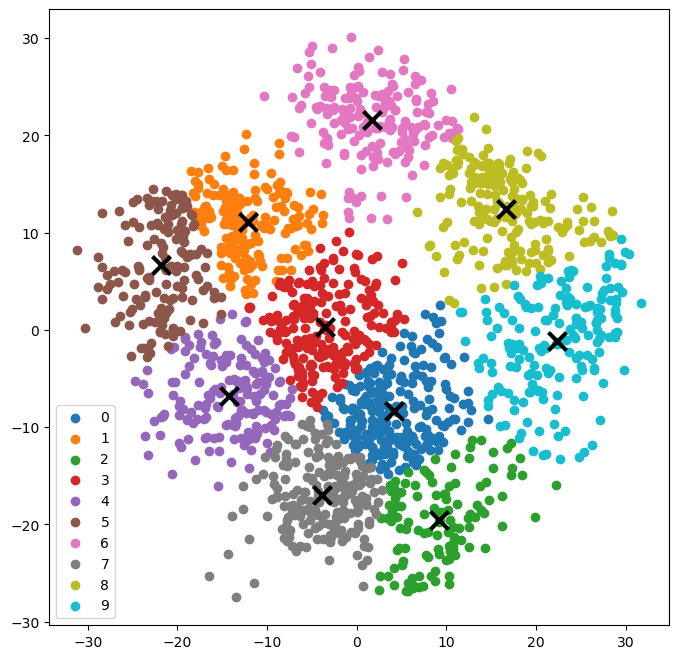

In [ ]:
# Reducing the dataset 
pca = PCA(2) 
reduced_data = pca.fit_transform(digits_data) 
kmeans_cluster.fit(reduced_data) 
  
# Calculating the centroids 
centroids = kmeans_cluster.cluster_centers_ 
label = kmeans_cluster.fit_predict(reduced_data) 
unique_labels = np.unique(label) 
  
# plotting the clusters: 
plt.figure(figsize=(8, 8)) 
for i in unique_labels: 
    plt.scatter(reduced_data[label == i, 0], 
                reduced_data[label == i, 1], 
                label=i) 
plt.scatter(centroids[:, 0], centroids[:, 1], 
            marker='x', s=169, linewidths=3, 
            color='k', zorder=10) 
plt.legend() 
plt.show() 